## Derived from StyleGAN Github repository at https://github.com/NVlabs/stylegan

In [1]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config


In [2]:
def generate(_G, _D, Gs):
    # Pick latent vector.
    rnd = np.random.RandomState(10)
    latents = rnd.randn(1, Gs.input_shape[1])
    
    latents

In [3]:
def generatemain(_G, _D, Gs, latents):
    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, 'example.png')
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

In [4]:
def main():
    # Initialize TensorFlow.
    tflib.init_tf()

    # Load pre-trained network.
    url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl
    with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
        _G, _D, Gs = pickle.load(f)
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

    # Print network details.
    Gs.print_layers()
    
    return _G, _D, Gs

In [5]:
_G, _D, Gs = main()


Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 512)             (512, 512)      
G_mapping/Dense3                262656 

In [6]:
generate(_G, _D, Gs)

In [8]:
rnd = np.random.RandomState(10)
latents = rnd.randn(1, Gs.input_shape[1])

generatemain(_G, _D, Gs, latents)

In [24]:
import time
import random

random.seed(time.time())
latents[0][0] = np.random.random()
# latents = rnd.randn(1, Gs.input_shape[1])

generatemain(_G, _D, Gs, latents)

### Show generated image

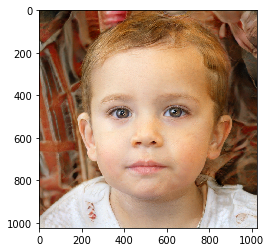

In [26]:
import matplotlib.pyplot as plt

fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

plt.imshow(images[0])
plt.show()

### Change latent vector using a sliding window
With a sliding window of size 10 with a high value of 5 it translates to generating a female face

As the window slides, we observe gradual aging of the person

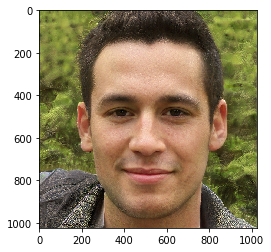

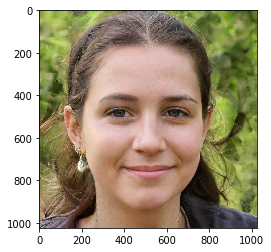

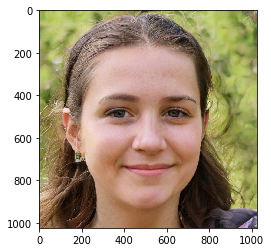

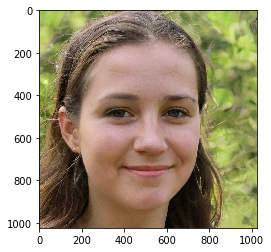

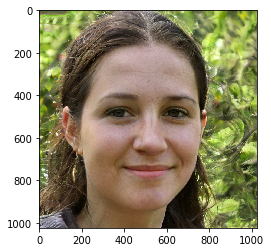

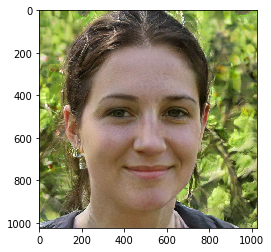

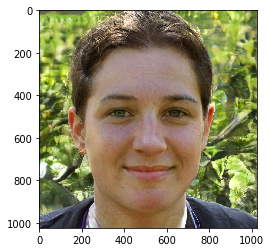

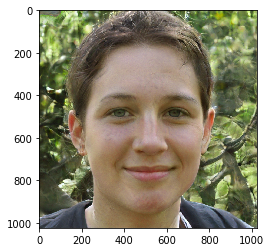

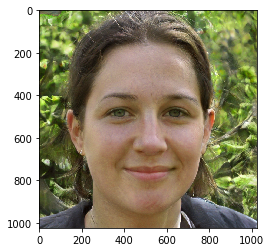

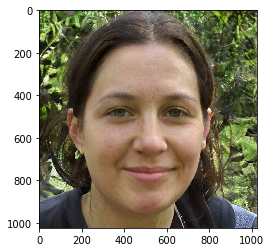

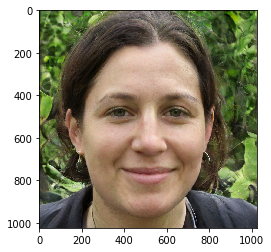

In [109]:
images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

plt.imshow(images[0])
plt.show()

newlatents = np.array(latents)

for j in range(0, 10):
    for i in range(100, 110):
        newlatents[0][i + j] = 5#j * 0.1#rnd.randn(1, 1)[0][0]

    images = Gs.run(newlatents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    plt.imshow(images[0])
    plt.show()